In [67]:
from source.config import INTERIM_DATA_DIR, EXTERNAL_DATA_DIR, VEHICLE_WEIGHT_FIGURES_DIR_74T
import os
import matplotlib.pyplot as plt
import pandas as pd

In [77]:
FILTER_THRESHOLD_LOWER = 40000
FILTER_THRESHOLD_UPPER = 94000

plot = True
save = False

In [69]:
df_74t_vehicle_weight_interim = pd.read_csv(INTERIM_DATA_DIR / "vehicle weight from 74t.csv")[['VIN', 'Max vekt']]
df_vehicle_matching = pd.read_csv(EXTERNAL_DATA_DIR / "bil_tilhenger_matching.csv")

# Holds valid weight registrations for both truck and trailer
df_74t_vehicle_weight = pd.concat(
    [
        df_74t_vehicle_weight_interim.merge(
            df_vehicle_matching[[col, 'ekvipasje']], 
            left_on='VIN', right_on=col, 
            how='inner'
        )
        for col in ['VIN_lastebil', 'VIN_tilhenger']
    ]
).drop(columns=['VIN_lastebil', 'VIN_tilhenger'], errors='ignore').dropna()


In [70]:
# + active="ipynb"
df_74t_vehicle_weight.head()

,VIN,Max vekt,ekvipasje
2,YV2R0P0G9JA834573,17504.0,4-akslet trekkvogn med 5-akslet tilhenger
3,YV2R0P0G9JA834573,17504.0,4-akslet trekkvogn med 5-akslet tilhenger
4,YV2R0P0G9JA834573,17504.0,4-akslet trekkvogn med 5-akslet tilhenger
6,YV2RT60D3LA865845,24326.0,3-akslet trekkvogn med 4-akslet tilhenger
8,YV2R0P0G9JA834573,6600.0,4-akslet trekkvogn med 5-akslet tilhenger


In [71]:
VINs_trucks = df_vehicle_matching['VIN_lastebil']
VINs_trailers = df_vehicle_matching['VIN_tilhenger']
df_74t_vehicle_weight_only_trucks = df_74t_vehicle_weight[df_74t_vehicle_weight['VIN'].isin(VINs_trucks)]
df_74t_vehicle_weight_only_trailers = df_74t_vehicle_weight[df_74t_vehicle_weight['VIN'].isin(VINs_trailers)]

In [72]:
# + active="ipynb"
len(df_74t_vehicle_weight_only_trucks), len(df_74t_vehicle_weight_only_trailers)

(14649, 3597)

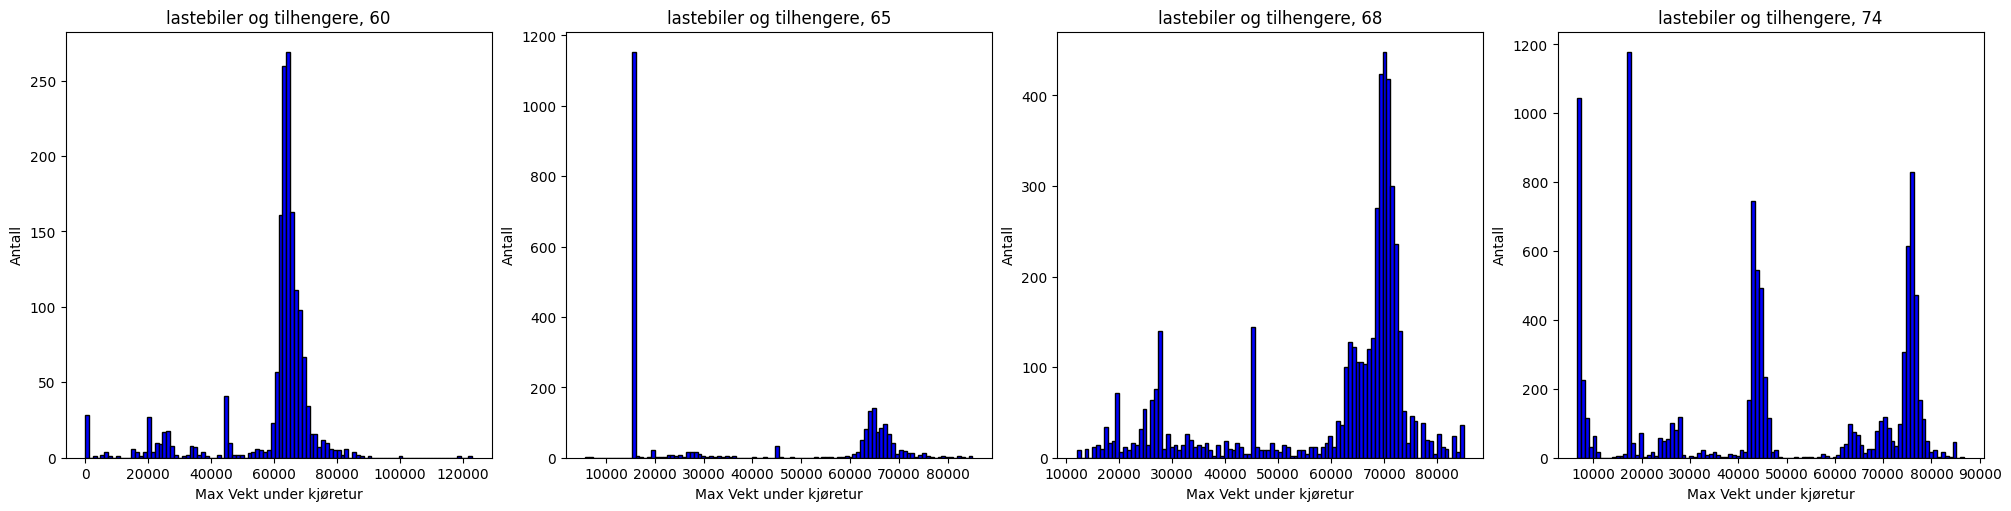

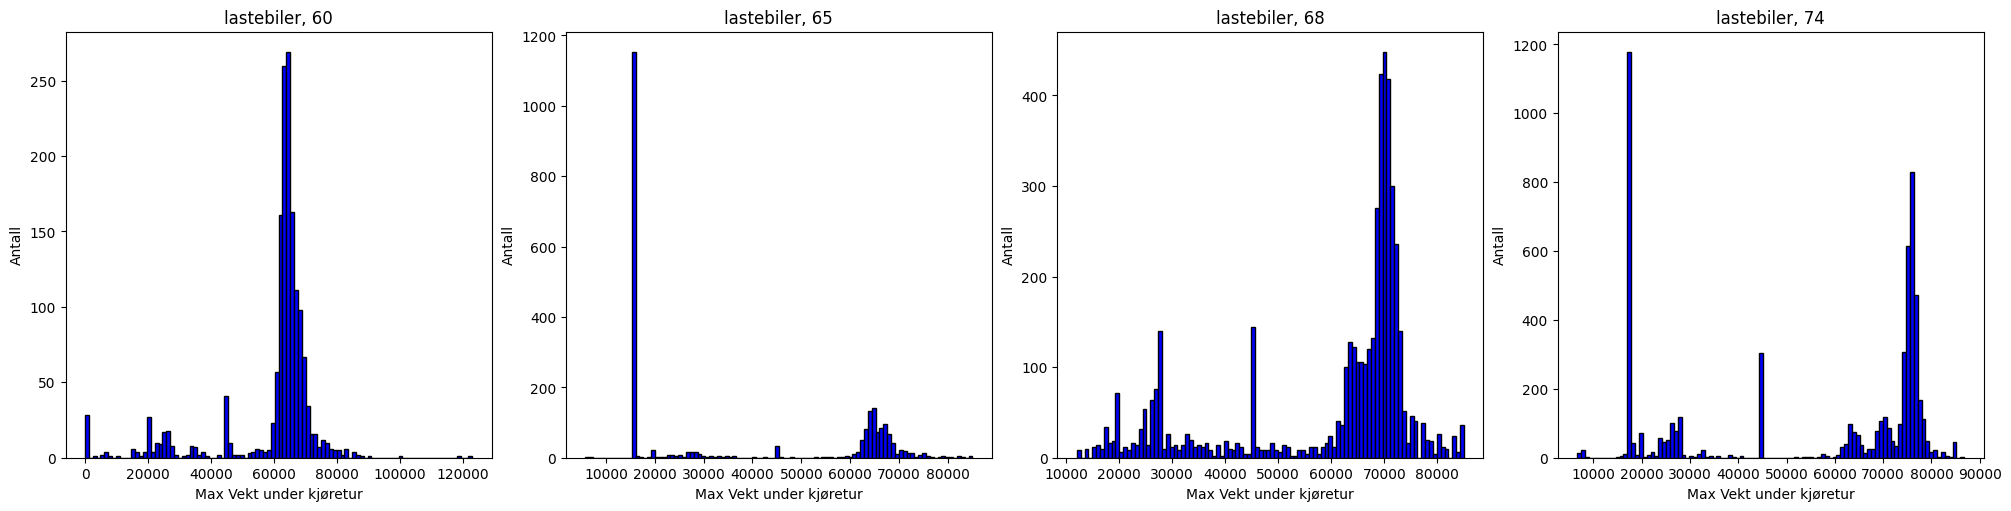

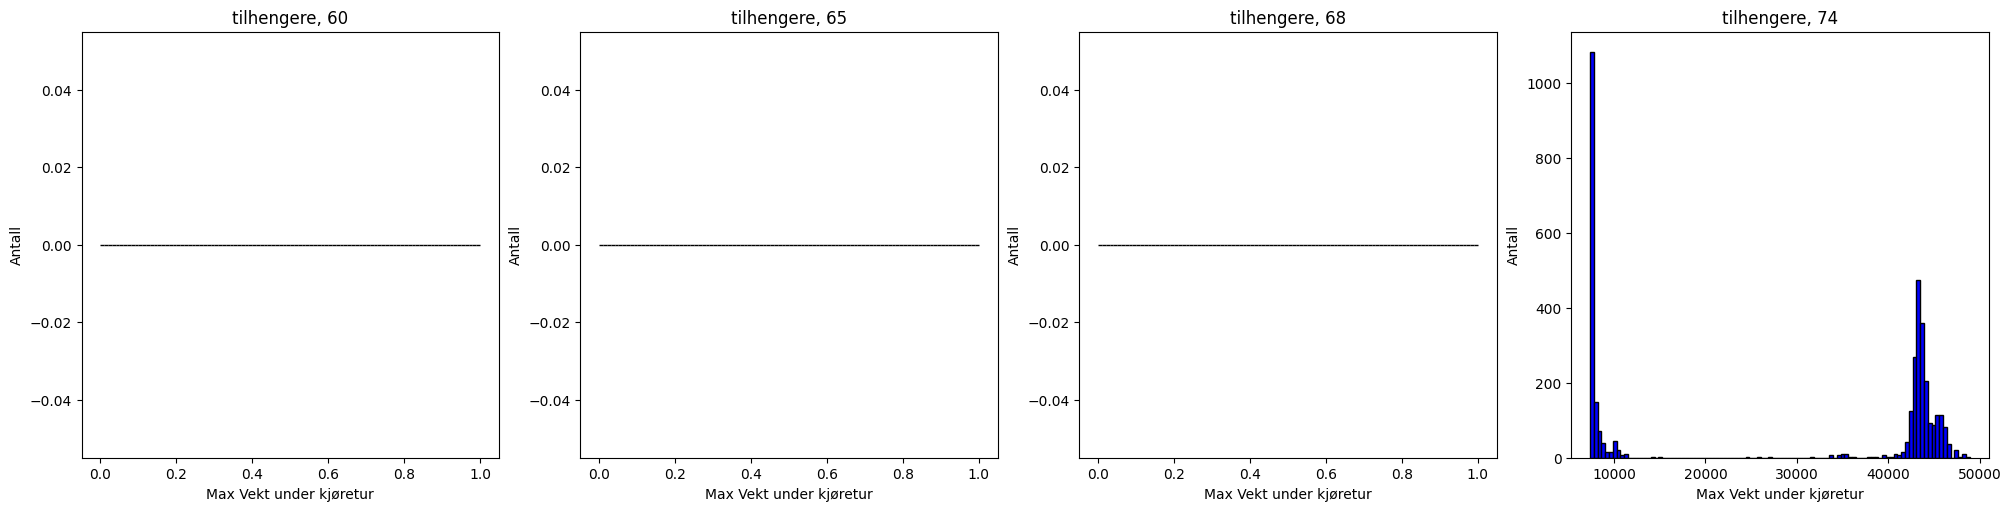

In [73]:
# + active="ipynb"
dfs_vehicle_combinations = [
    ('lastebiler og tilhengere', df_74t_vehicle_weight),
    ('lastebiler', df_74t_vehicle_weight_only_trucks),
    ('tilhengere', df_74t_vehicle_weight_only_trailers)
]


for i, (combination, df_combination) in enumerate(dfs_vehicle_combinations):
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), constrained_layout=True)
    for j, (tonnage, equipage) in enumerate([
        (60, '3-akslet trekkvogn med 4-akslet tilhenger'),
        (65, '3-akslet trekkvogn med 5-akslet tilhenger'),
        (68, '4-akslet trekkvogn med 4-akslet tilhenger'),
        (74, '4-akslet trekkvogn med 5-akslet tilhenger'),
    ]):
        # Filter weights for the given equipage
        weights = df_combination[df_combination['ekvipasje'] == equipage]['Max vekt'].dropna()
        
        # Create the histogram plot
        ax = axes[j]
        ax.hist(weights, bins=100, color='blue', edgecolor='black')

        # Set titles and labels
        ax.set_title(f"{combination}, {tonnage}")
        ax.set_xlabel('Max Vekt under kjøretur')
        ax.set_ylabel('Antall')

    # Show the figure after each outer loop iteration
    plt.show()


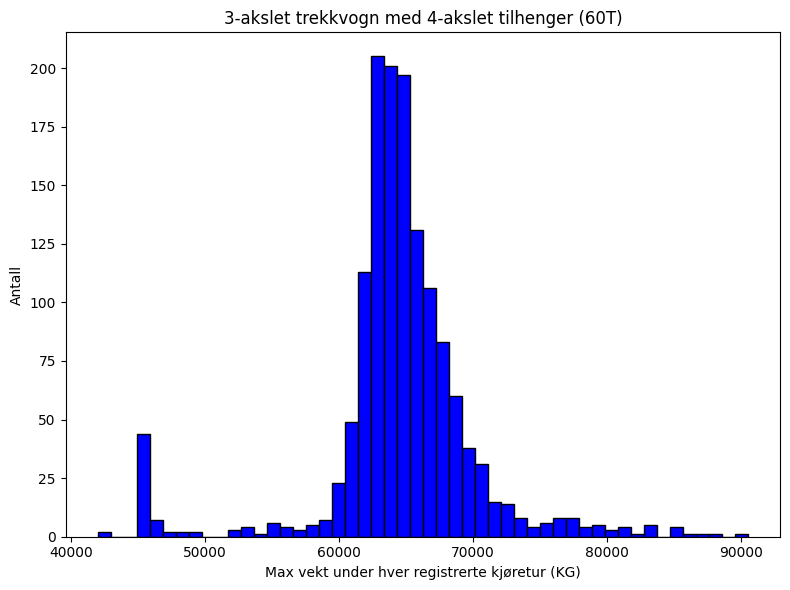

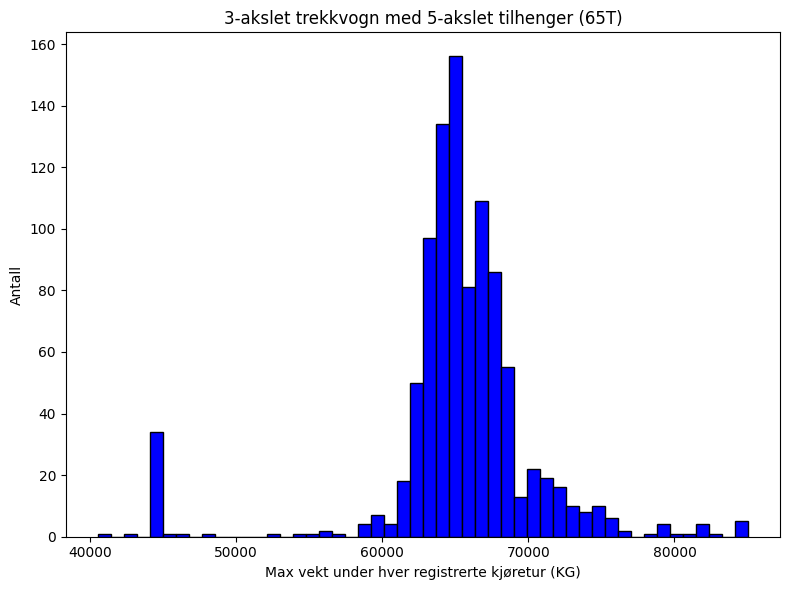

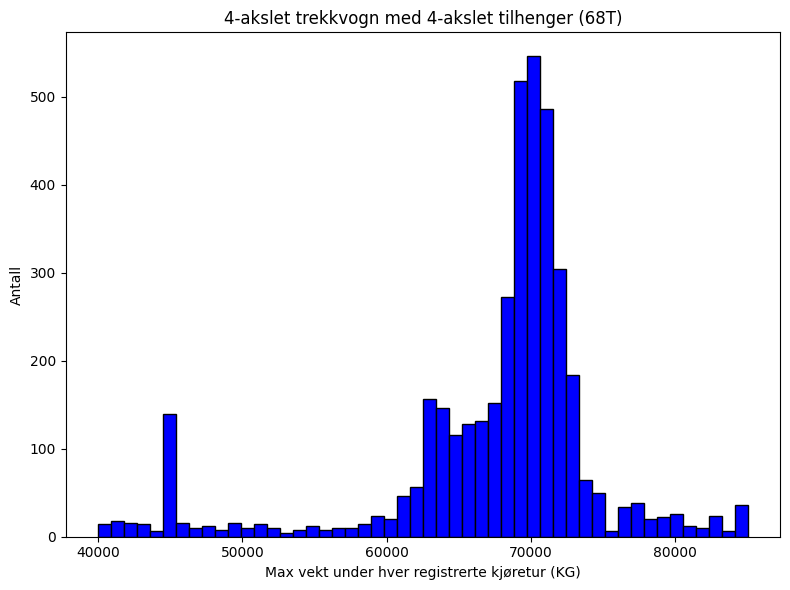

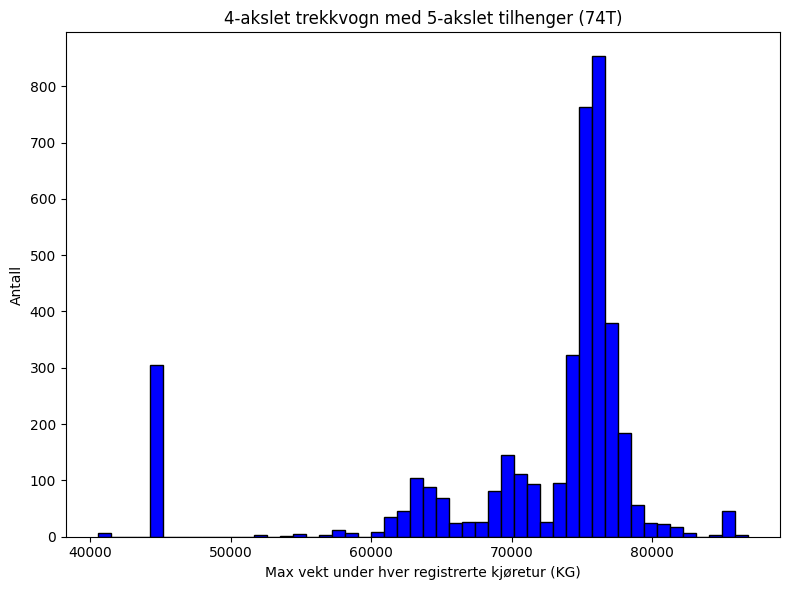

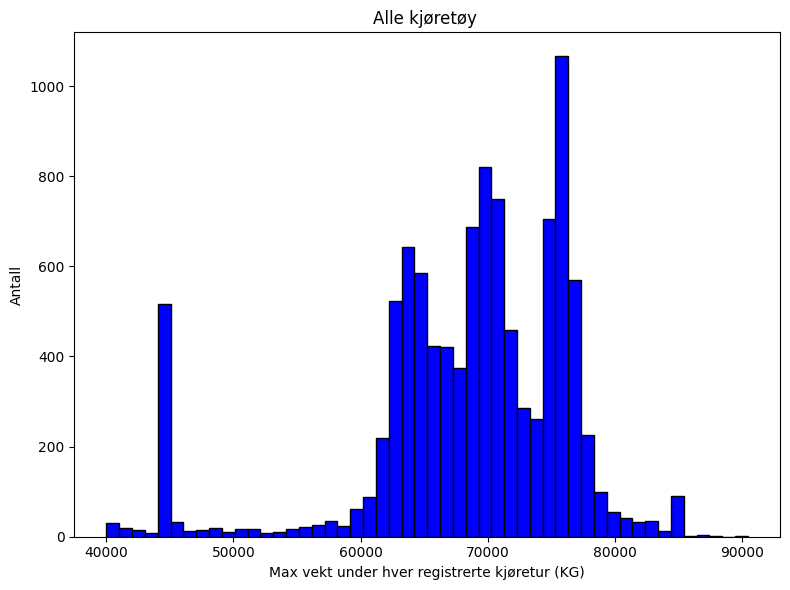

In [78]:
for tonnage, equipage in [
    (60, '3-akslet trekkvogn med 4-akslet tilhenger'),
    (65, '3-akslet trekkvogn med 5-akslet tilhenger'),
    (68, '4-akslet trekkvogn med 4-akslet tilhenger'),
    (74, '4-akslet trekkvogn med 5-akslet tilhenger'),
    (None, 'Alle kjøretøy')
]:
    
    weights = df_74t_vehicle_weight_only_trucks['Max vekt'].dropna()
    if equipage != 'Alle kjøretøy':
        weights = weights[df_74t_vehicle_weight_only_trucks['ekvipasje'] == equipage]

    filtered_weights = weights[(FILTER_THRESHOLD_LOWER <= weights) & (weights <= FILTER_THRESHOLD_UPPER)]

    title = f"{equipage} {f'({tonnage}T)'if tonnage else ''}"
    plt.figure(figsize=(8, 6))
    plt.hist(filtered_weights, bins=50, color='blue', edgecolor='black')
    plt.title(title)
    plt.xlabel('Max vekt under hver registrerte kjøretur (KG)')
    plt.ylabel('Antall')
    plt.tight_layout()

    if save:
        plt.savefig(VEHICLE_WEIGHT_FIGURES_DIR_74T / f"vehicle_weight_distribution_74t_{equipage.replace(' ', '_')}.png")

    if plot:
        plt.show()
